In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt       # Standard plotting library                 
from IPython.display import display   # A notebook function to display more complex data (like tables)
import scipy.stats as stats           # Scipy again
from math import *

In [2]:
#read an csv file 
df = pd.read_csv(r'C:\Users\Smegn\Documents\GitHub\AdSmart\AdSmartABdata.csv')
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,control,2020-07-05,14,Generic Smartphone,6,Chrome Mobile,0,0


# Data Wrangling

In [3]:
#missing value check
df.isna().any()

auction_id     False
experiment     False
date           False
hour           False
device_make    False
platform_os    False
browser        False
yes            False
no             False
dtype: bool

In [4]:
#see data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [21]:
#classify columns by datatype and make list
#data type =object
categorical = ['auction_id', 'experiment', 'date', 'device_make', 'browser']
#data type ='int16', 'int32', 'int64', 'float16', 'float32', 'float64
numerical = ['hour', 'platform_os', 'yes', 'no']

features = categorical + numerical 
df1 = df[features]
df1.head(3)


,auction_id,experiment,date,device_make,browser,hour,platform_os,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,Generic Smartphone,Chrome Mobile,8,6,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,Generic Smartphone,Chrome Mobile,10,6,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,E5823,Chrome Mobile WebView,2,6,0,1


# Dealing with outliers

In [62]:
#Since data is sample data and we do not know total poulation so we can use z-score
#to detect and remove outliers
# identify outliers with z-score it helps us to understand
# data value is greater or smaller than mean and how far away it is from the mean.

#col_outlier=df[['hour','platform_os','yes','no','experiment','browser','device_make']]
#z_scores = stats.zscore(col_outlier)
#find absolute value of each element
#abs_z_scores = np. abs(z_scores)
#filter rows with outlier and remove
#filtered_entries = (abs_z_scores < 3). all(axis=1)
#cleaned data
#new_df = df[filtered_entries]
#new_df
#plt.hist(z_scores)
def is_outlier(data,col):
    z_scores = stats.zscore(data[col])
    abs_z_scores = np.abs(z_scores)
    if (abs_z_scores < 3). all():
        print('there is  outlier')
    else:
        print('there is no outlier')
        
is_outlier(df,col)  
    

there is no outlier


In [60]:
for col in df1[numerical].columns:
    print(col, '-', is_outlier(df,col))

there is outlier
hour - None
there is no outlier
platform_os - None
there is no outlier
yes - None
there is no outlier
no - None


# Check normally distributed features of the data

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'platform_os distribution')]

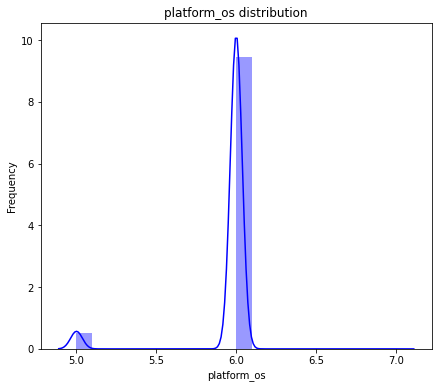

In [69]:
f, ax = plt.subplots(figsize=(7, 6))
sb.distplot(df['platform_os'], bins = 20, color = 'blue')
ax.set(ylabel="Frequency")
ax.set(xlabel="platform_os")
ax.set(title="platform_os distribution")

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'yes distribution')]

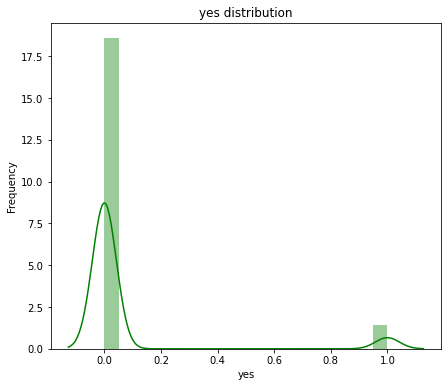

In [75]:
 f, ax = plt.subplots(figsize=(7, 6))
sb.distplot(df['yes'], bins = 20, color = 'green')
ax.set(ylabel="Frequency")
ax.set(xlabel="yes")
ax.set(title="yes distribution")

# df.hour.value_counts()

In [76]:
#convert string to number
df['experiment']=df['experiment'].astype('category').cat.codes
df['device_make']=df['device_make'].astype('category').cat.codes
df['browser']=df['browser'].astype('category').cat.codes

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'browser distribution')]

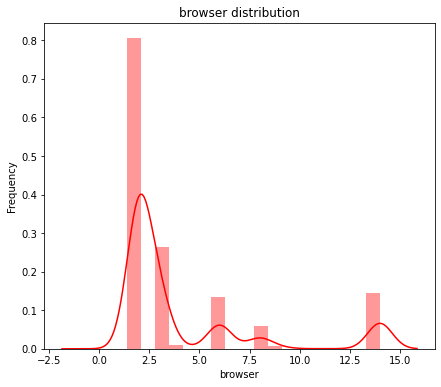

In [77]:
f, ax = plt.subplots(figsize=(7, 6))
sb.distplot(df['browser'], bins = 20, color = 'red')
ax.set(ylabel="Frequency")
ax.set(xlabel="browser")
ax.set(title="browser distribution")

# df.hour.value_counts()

C:\Users\Smegn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'device_make distribution')]

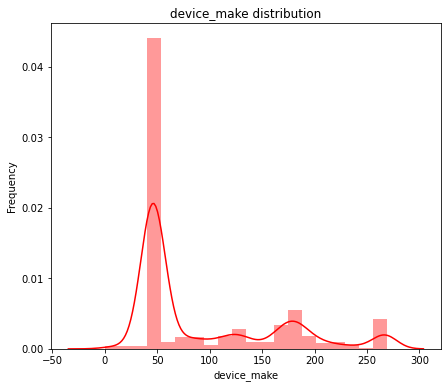

In [78]:
f, ax = plt.subplots(figsize=(7, 6))
sb.distplot(df['device_make'], bins = 20, color = 'red')
ax.set(ylabel="Frequency")
ax.set(xlabel="device_make")
ax.set(title="device_make distribution")


# Scaling and normalization

As you see from the plots the distribution of each variable is not normal, which is skewed

In [96]:
########################################

array([[<AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'platform_os'}>],
       [<AxesSubplot:title={'center':'yes'}>,
        <AxesSubplot:title={'center':'no'}>]], dtype=object)

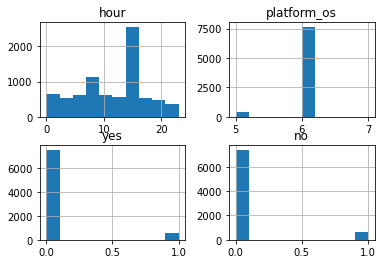

In [86]:
df1.hist()

In [101]:
#feature variable is experiment
# get the target variable from the yes/no cols then drop yes/no cols

# the 1s in yes remain the same, the 1s in no become 2s, the entries with 0s in both cols remain as 0s.
# create the target variable from the yes/no cols then drop yes/no cols

# the 1s in yes remain the same, the 1s in no become 2s, the entries with 0s in both cols remain as 0s.
features['target'] = 0
features.loc[features['yes'] ==1, 'target'] = 1
features.loc[features['no'] ==1, 'target'] = 2
features = features.drop(['yes', 'no'], axis = 1)
# features = features[features.target != 0]
# features.loc[features['target'] ==2, 'target'] = 0
print(features.shape)
features.target.value_counts()

features.head()

features = features[features.target != 0]
features.loc[features['target'] ==2, 'target'] = 0
print(features.shape)
features.target.value_counts()

features.head()


TypeError: list indices must be integers or slices, not str

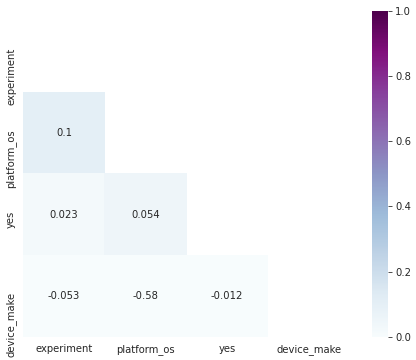

In [95]:
def correlation_map(f_data, f_feature, f_number):
    f_most_correlated = f_data.corr().nlargest(f_number,f_feature)[f_feature].index
    f_correlation = f_data[f_most_correlated].corr()
    
    f_mask = np.zeros_like(f_correlation)
    f_mask[np.triu_indices_from(f_mask)] = True
    with sb.axes_style("white"):
        f_fig, f_ax = plt.subplots(figsize=(8, 6))
        f_ax = sb.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                           annot=True, annot_kws={"size": 10}, cmap="BuPu")

    plt.show()

correlation_map(df, 'experiment', 4)
